In [67]:
import numpy as np
import matplotlib.pyplot as plt

# 1

In [68]:
def xy_a_s(x, y, L):
    return y * L + x

def s_a_xy(s, L):
    return s % L, s // L

def vecino(s, j, L, empty):
    if j == 0:  
        if s % L == L - 1:
            return empty
        else:
            return s + 1
    elif j == 1:  
        if s // L == L - 1:
            return empty
        else:
            return s + L
    elif j == 2:  
        if s % L == 0:
            return empty
        else:
            return s - 1
    elif j == 3:  
        if s // L == 0:
            return empty
        else:
            return s - L

def boundaries(L, N, empty):
    nn = np.zeros((N, 4), dtype=int)
    for s in range(N):
        for j in range(4):
            nn[s, j] = vecino(s, j, L, empty)
    return nn

In [69]:
def HLA(L, N, p, nn, empty):
    site = np.zeros(N, dtype=np.short)
    
    xseed, yseed = L // 2, L // 2
    sseed = xy_a_s(xseed, yseed, L)
    site[sseed] = 1  
    cluster = np.array([sseed])
    
    per = np.array([nn[sseed, j] for j in range(4) if nn[sseed, j] != empty], dtype=int)
    site[per] = 2  
    
    while len(per) > 0:
        index = np.random.randint(len(per))
        snew = per[index]
        per = np.delete(per, index)
        escPer = np.random.random()
        if escPer < p:
            site[snew] = 1  
            cluster = np.append(cluster, snew)
            for j in range(4):
                sper = nn[snew, j]
                if sper != empty and site[sper] == 0:
                    per = np.append(per, sper)
                    site[sper] = 2  
        else:
            site[snew] = empty
        
    return site, cluster

[[  1  16  -1  -1]
 [  2  17   0  -1]
 [  3  18   1  -1]
 ...
 [254  -1 252 237]
 [255  -1 253 238]
 [ -1  -1 254 239]]
[136 135 120 119 121 103  87 122 102  86 123 105 107 108 139  91  85 104
  90 155 154 138 140  69 153 141 157 171  53 158 172 173  68  37 188 142
  54 187  36 204 205 220  52  67  55 186  21  35 143  83 203  99 206   5
  19 115   4 202  39  40  34 100 218 207 156 217  23 233 131  82  24  81
 191  50 190  49   3 132 175 169  33  66 249  97  18  51 248   2 223   1
 222   0 133  16 149 148 117 216 150 250 215 165 199 168  20 231  41 214
 167 198 238 181 254 255 213 197 196 113 237 184 182 164 112 229 245 244
 243 228 242]
[ 1  1  1  1  1  1 -1 -1 -1  0  0  0  0  0  0  0  1 -1  1  1  1  1 -1  1
  1 -1  0  0  0  0  0  0 -1  1  1  1  1  1 -1  1  1  1 -1  0  0  0  0  0
 -1  1  1  1  1  1  1  1 -1 -1  0  0  0  0  0  0  0 -1  1  1  1  1 -1 -1
  0  0 -1 -1  0  0  0  0 -1  1  1  1 -1  1  1  1 -1 -1  1  1 -1  0  0  0
 -1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  0  0  1  1 -1  1 -1

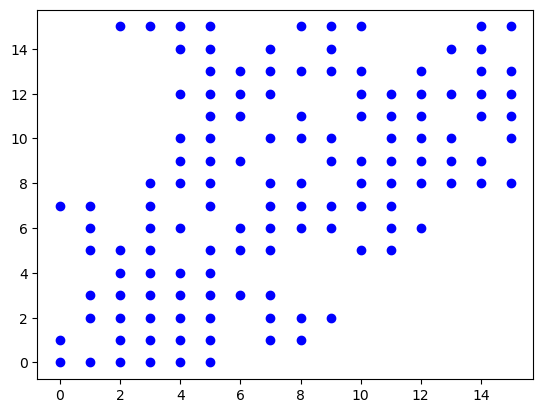

In [70]:
L = 16
p = 0.59275
N = L * L
empty = -1

nn = boundaries(L, N, empty)

site, cluster = HLA(L, N, p, nn, empty)

print(nn)
print(cluster)
print(site)

ncluster = np.array([s_a_xy(s, L) for s in cluster])

fig, ax = plt.subplots()
ax.plot(ncluster[:, 0], ncluster[:, 1], 'bo')
plt.show()


/var/folders/yv/xkr121fn6sg196g8ytf0bq3m0000gn/T/ipykernel_79070/929198595.py:4: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = plt.Rectangle((x, y), 1, 1, color='r', edgecolor='k')


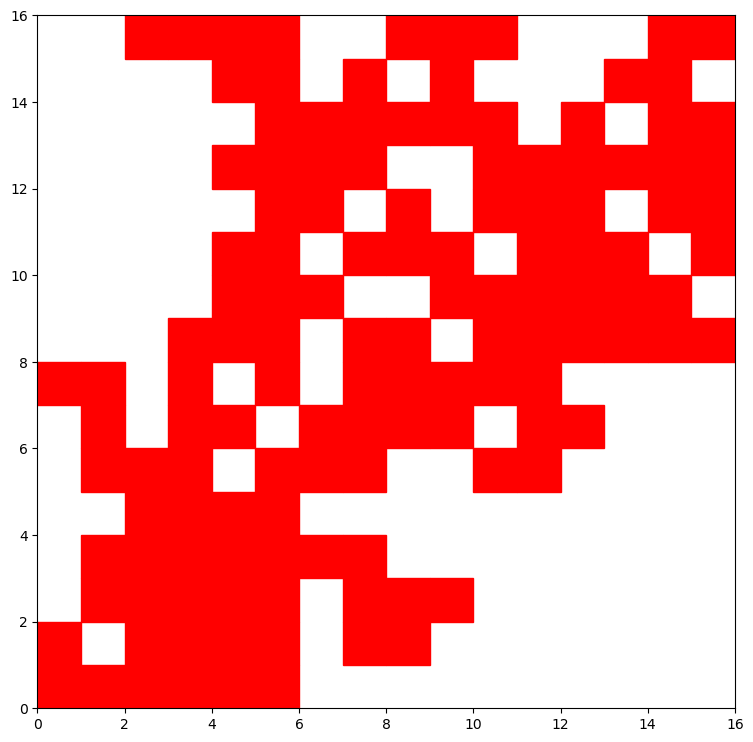

In [71]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(1,1,1)
for x, y in ncluster:
    rect = plt.Rectangle((x, y), 1, 1, color='r', edgecolor='k')
    ax.add_patch(rect)

plt.xlim(0, L)
plt.ylim(0, L)
plt.show()

# 2

In [97]:
def MassDist(L, cluster):
    # Convert cluster indices to 2D coordinates
    cluster_coords = np.array([s_a_xy(s, L) for s in cluster])
    xCluster, yCluster = cluster_coords[:, 0], cluster_coords[:, 1]
    
    Ncluster = xCluster.size
    xcm = xCluster[:Ncluster].mean()
    ycm = yCluster[:Ncluster].mean()
    dx = xCluster[:Ncluster] - xcm
    dy = yCluster[:Ncluster] - ycm
    dr = np.sqrt(dx*dx + dy*dy)
    massinside = []
    r = []
    imax = int(np.log2(L))
    for i in range(1, imax):
        massinside.append(dr[dr < (2**i)].size)
        r.append(2**i)
    return np.array(r), np.array(massinside)

In [98]:
def MassDist2(L, cluster):
    cluster_coords = np.array([s_a_xy(s, L) for s in cluster])
    xCluster, yCluster = cluster_coords[:, 0], cluster_coords[:, 1]
    
    xcm = np.mean(xCluster)
    ycm = np.mean(yCluster)
    
    dx = xCluster - xcm
    dy = yCluster - ycm
    dr = np.sqrt(dx**2 + dy**2)
    
    r_values = np.arange(1, L//2)
    mass_distribution = np.zeros_like(r_values, dtype=float)
    
    for i, r in enumerate(r_values):
        mass_distribution[i] = np.sum(dr < r)
        
    return r_values, mass_distribution

In [99]:
def lineFit(x, y):
    xavg = x.mean()
    slope = (y * (x - xavg)).sum() / (x * (x - xavg)).sum()
    yint = y.mean() - slope * xavg
    return slope, yint

In [100]:
def correr(L, N, p, nn, empty, num_realizaciones):
    massDtot = []

    for _ in range(num_realizaciones):
        site, cluster = HLA(L, N, p, nn, empty)
        r, massD = MassDist(L, cluster)
        massDtot.append(massD)

    # Average the mass distributions
    massDprom = np.mean(massDtot, axis=0)
    
    return r, massDprom

In [101]:
def correr2(L, N, p, nn, empty, num_realizaciones):
    massDtot = []

    for _ in range(num_realizaciones):
        site, cluster = HLA(L, N, p, nn, empty)
        r, massD = MassDist2(L, cluster)
        massDtot.append(massD)

    # Average the mass distributions
    massDprom = np.mean(massDtot, axis=0)
    
    return r, massDprom

In [112]:
L = 16
p = 0.59275
N = L * L
empty = -1
realizaciones = 100
nn = boundaries(L, N, empty)

r, massDprom = correr(L, N, p, nn, empty, realizaciones)
r2, massDprom2 = correr2(L, N, p, nn, empty, realizaciones)


In [113]:
slope, corte = lineFit(np.log(r),np.log(massDprom))
error = np.abs((slope-1.89)/1.89)*100
print('dimension fractal = {}, error = {} %'.format(round(slope,2),round(error,1)))

dimension fractal = 1.59, error = 15.8 %


Text(2, 61.749, '$d_f =$ 1.59')

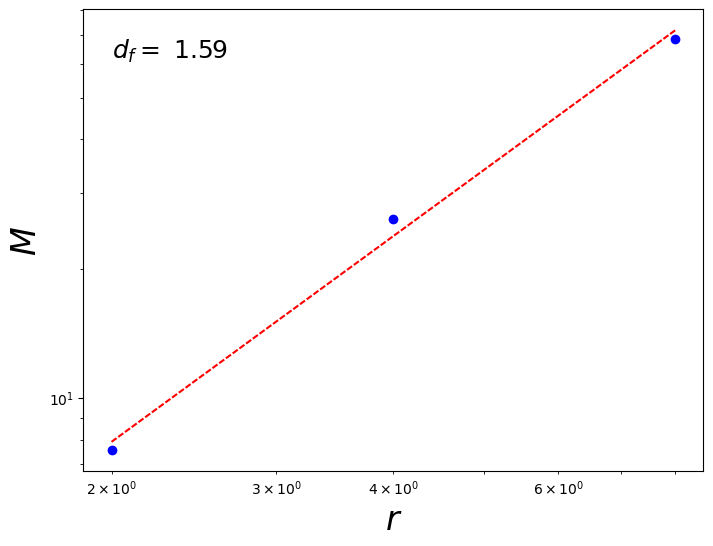

In [114]:
plt.figure(figsize=(8,6))
plt.loglog(r, massDprom, 'bo')
plt.plot(r, np.exp(corte) * r**slope, color = 'red', dashes = (3,1))
plt.xlabel(r'$r$',fontsize = 24)
plt.ylabel(r'$M$',fontsize = 24)
plt.text(r.min(), 0.9 * massDprom.max(),r'$d_f =$ {}'.format(round(slope,2)), fontsize = 18)

In [115]:
slope2, intercept2 = lineFit(np.log(r2), np.log(massDprom2))
error2 = np.abs((slope2 - 1.89) / 1.89) * 100
print('Fractal dimension = {}, error = {} %'.format(round(slope2, 2), round(error2, 1)))

Fractal dimension = 1.81, error = 4.5 %


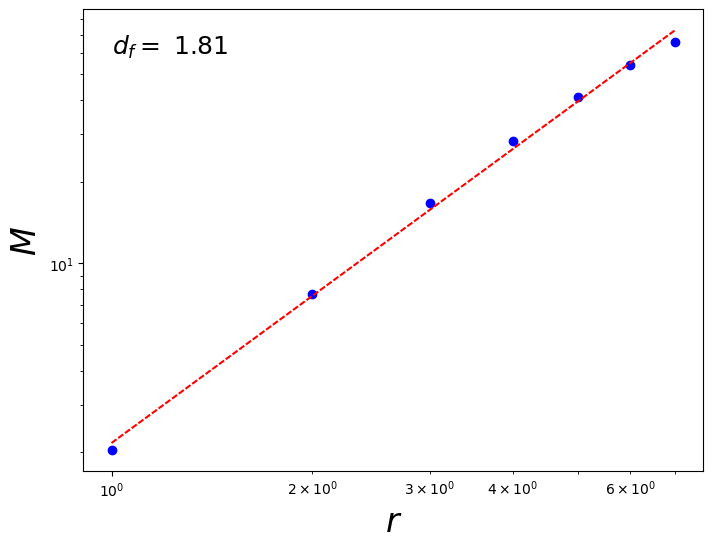

In [116]:
plt.figure(figsize=(8, 6))
plt.loglog(r2, massDprom2, 'bo')
plt.plot(r2, np.exp(intercept2) * r2**slope2, color='red', dashes=(3, 1))
plt.xlabel(r'$r$', fontsize=24)
plt.ylabel(r'$M$', fontsize=24)
plt.text(r2.min(), 0.9 * massDprom2.max(), r'$d_f =$ {}'.format(round(slope2, 2)), fontsize=18)
plt.show()